In [2]:
%matplotlib notebook
%pylab


Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


Solution to the advection equation
$G(x,t,\xi,\tau)$

<IPython.core.display.Javascript object>


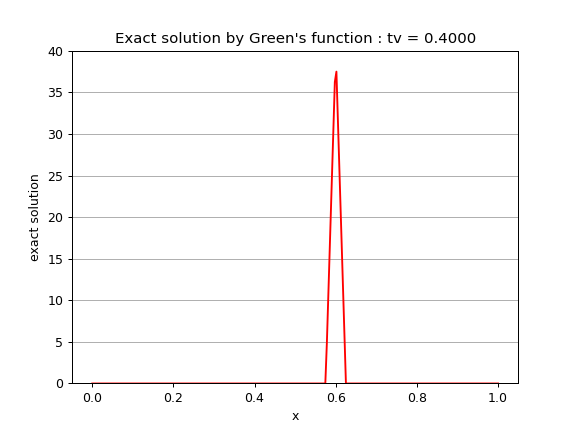

In [17]:
from scipy.special import erf
epsilon=0.05
def Hatfunct(x):
    return np.where(abs(x)<=(epsilon/2),(2/epsilon)*(1-abs((2*x))/epsilon),0)
def heaviside_hat(x):
    a = 5e-1  # not 10e-5  (unless you mean 10^{-4})
    condition1 = x < -a/2
    condition2 = np.logical_and(-a/2 <= x, x < 0)
    condition3 = np.logical_and(0 <= x, x < a/2 )
    condition4 = x > a/2

    h = where(condition1, 0.0, 0.0)
    h = where(condition2, 1/2 + ((2/a)*(x+(((x)**2)/a))), h)
    h = where(condition3, 1/2 + ((2/a)*(x-(((x)**2)/a))), h)
    h = where(condition4, 1.0, h)
    return h   

# h= heaviside_hat(x)
c=1
a=0
b=1
# dx=0.01
N = 256
dx = (b-a)/N
t0=0
T=0.4
M = 20
t= linspace(t0,T,M+1)
x=linspace(a,b,N+1)
def Gfunct(x,t,si,tau):
    return Hatfunct(x-si-c*(t-tau))*heaviside_hat(t-tau)
si = 0.3
# tau=0.3
tau=0.1
Qhat = zeros((len(t),len(x)))
for n in range(len(t)):
    for j in range(len(x)):
        # Qhat[n,j] = Gfunct(t[n],x[j],si,tau)
        Qhat[n,j] = Gfunct(x[j],t[n],si,tau)
fig = figure(1)
clf()
        
hdl, = plot(x,Qhat[0],'r')
tv = t[0]
tstr = 'Exact solution by Green\'s function : tv = {:.4f}'.format
htitle = title(tstr(0))
xlabel('x')
ylabel('exact solution')
htitle.set_text(tstr(tv))
grid(axis='y')
for m in range(len(t)):
    hdl.set_ydata(Qhat[m])
    ylim([0,40])
    tv = t[m]
    htitle.set_text(tstr(tv))
    
    fig.canvas.draw()   
    pause(0.2) 


more epsilon less the flow of the curve(Plus epsilon est grand, la courbe devient petite.)

In [5]:
x=np.linspace(-1,1,1001)
epsilon=0.05

def step_funct(x):
    return (heaviside(x+epsilon/2,1) - heaviside(x-epsilon/2,1))/epsilon

def heaviside_step(x):
#     a1 = 2e-1
    a1=2e-1
    return where(abs(x) <= a1/2, x/a1 + 1/2, heaviside(x,1))

# # Exact heavside function
# xf = linspace(-1,1,513)
# plot(xf,heaviside(xf,1),'r',label='H(x)')
# plot(xf,heaviside_step(xf,0.1), 'k',linewidth=0.9)
    
# # Heaviside function (Step function)
# x = linspace(-1,1,101)
# H = heaviside_step(x,0.1)
# plot(x,heaviside_step(x,0.1), 'b.',label='Heaviside (Step)')


    
legend()

# h= heaviside_hat(x)
c=1
a=0
b=1
# dx=0.01
N = 256
dx = (b-a)/N
t0=0
T=0.5
M = 20
t= linspace(t0,T,M+1)
x=linspace(a,b,N+1)
def Gfunct(x,t,si,tau):
    return step_funct(x-si-c*(t-tau))*heaviside_step(t-tau)
si = 0.3
tau=0.1
Qhat = zeros((len(t),len(x)))
for n in range(len(t)):
    for j in range(len(x)):
        # Qhat[n,j] = Gfunct(t[n],x[j],si,tau)
        Qhat[n,j] = Gfunct(x[j],t[n],si,tau)
fig = figure(1)
clf()
        
hdl, = plot(x,Qhat[0],'r')
tv = t[0]
tstr = 'Exact solution by Green\'s function : tv = {:.4f}'.format
htitle = title(tstr(0))
xlabel('x')
ylabel('exact solution')
htitle.set_text(tstr(tv))
grid(axis='y')
for m in range(len(t)):
    hdl.set_ydata(Qhat[m])
    ylim([0,40])
    tv = t[m]
    htitle.set_text(tstr(tv))
    
    fig.canvas.draw()   
    pause(0.2) 


No handles with labels found to put in legend.
